In [82]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
xom = pd.read_csv('data/XOM.csv', index_col='Date')
xom['MA7'] = xom['Close'].rolling(7).mean()
xom['MA40'] = xom['Close'].rolling(40).mean()
xom = xom.dropna()
xom.head()

,Open,High,Low,Close,Adj Close,Volume,MA7,MA40
Date,,,,,,,,
2019-02-28,79.449997,79.750000,78.709999,79.029999,65.795525,14597900,78.632857,74.06350
2019-03-01,79.379997,80.000000,79.029999,80.000000,66.603081,15419400,78.842857,74.32125
2019-03-04,80.239998,80.550003,79.010002,80.309998,66.861168,18089900,79.198571,74.61350
2019-03-05,80.120003,80.400002,79.750000,80.190002,66.761269,13745500,79.451429,74.83950
2019-03-06,78.849998,79.379997,77.860001,79.279999,66.003654,18633600,79.562858,75.03350


In [106]:
xom['Shares'] = [1 if xom.loc[ei, 'MA7']>xom.loc[ei, 'MA40'] else 0 for ei in xom.index]

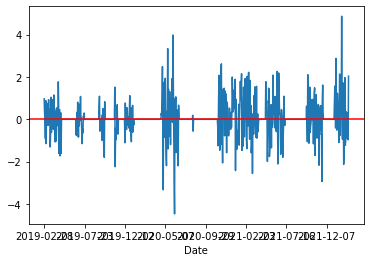

In [107]:
xom['Close1'] = xom['Close'].shift(-1)
xom['Profit'] = [xom.loc[ei, 'Close1'] - xom.loc[ei, 'Close'] if xom.loc[ei, 'Shares']==1 else 0 for ei in xom.index]
xom['Profit'].plot()
plt.axhline(y=0, color='red')

In [108]:
xom['wealth'] = xom['Profit'].cumsum()
xom.tail()

,Open,High,Low,Close,Adj Close,Volume,MA7,MA40,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2022-02-18,77.160004,78.169998,76.889999,77.360001,77.360001,23394800,78.480000,72.70100,1,76.459999,-0.900002,24.880002
2022-02-22,79.669998,79.790001,75.309998,76.459999,76.459999,35947800,78.225714,73.08700,1,76.769997,0.309998,25.190000
2022-02-23,76.459999,77.470001,76.129997,76.769997,76.769997,25385000,77.734286,73.45900,1,75.800003,-0.969994,24.220006
2022-02-24,79.000000,79.029999,74.029999,75.800003,75.800003,46199900,77.280000,73.81175,1,77.839996,2.039993,26.259999
2022-02-25,76.690002,77.989998,76.260002,77.839996,77.839996,28310300,77.258571,74.22900,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money gain is 26.259998999999972')

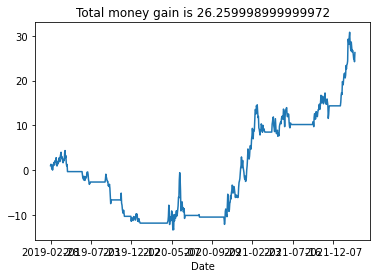

In [109]:
xom['wealth'].plot()
plt.title('Total money gain is {}'.format(xom.loc[xom.index[-2], 'wealth']))